In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install basketball_reference_scraper

Note: you may need to restart the kernel to use updated packages.


In [3]:
from basketball_reference_scraper.teams import get_roster, get_team_stats, get_opp_stats, get_roster_stats, get_team_misc
from basketball_reference_scraper.players import get_stats, get_game_logs, get_player_headshot
from basketball_reference_scraper.pbp import get_pbp
from basketball_reference_scraper.box_scores import get_box_scores
from basketball_reference_scraper.pbp import get_pbp
from basketball_reference_scraper.shot_charts import get_shot_chart
from basketball_reference_scraper.injury_report import get_injury_report
from basketball_reference_scraper.drafts import get_draft_class
pd.set_option('display.max_columns', None)

In [4]:
draft_14 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2014_draft_class.csv")
draft_15 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2015_draft_class.csv")
draft_16 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2016_draft_class.csv")
draft_17 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2017_draft_class.csv")
draft_18 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2018_draft_class.csv")
draft_19 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2019_draft_class.csv")
draft_20 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2020_draft_class.csv")
draft_21 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2021_draft_class.csv")
draft_22 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2022_draft_class.csv")
draft_23 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2023_draft_class.csv")
rookies_eff = pd.concat([draft_14,draft_15,draft_16,draft_17,draft_18,draft_19,draft_20,draft_21,draft_22,draft_23])
rookies_eff.head()

,PLAYER,PICK,TEAM,YEAR,G,MP,FG,FGA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,ADVANCED_WS,ADVANCED_BPM,ADVANCED_VORP,PER
0,Andrew Wiggins,1,CLE,2014,82.0,36.2,6.1,13.9,4.3,5.7,1.6,2.9,2.1,1.0,0.6,2.2,2.3,16.9,29.1,-1.5,2.8,11.5
1,Jabari Parker,2,MIL,2014,25.0,29.5,5.2,10.5,1.8,2.6,2.0,3.5,1.7,1.2,0.2,1.9,1.7,12.3,13.8,-0.8,2.5,12.6
2,Joel Embiid,3,PHI,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.5,7.0,31.4,NaN
3,Aaron Gordon,4,ORL,2014,47.0,17.0,2.0,4.4,0.9,1.3,1.0,2.6,0.7,0.4,0.5,0.8,1.8,5.2,42.6,0.3,11.3,9.5
4,Dante Exum,5,UTA,2014,82.0,22.2,1.8,5.1,0.2,0.4,0.3,1.3,2.4,0.5,0.2,1.4,1.8,4.8,5.9,-2.8,-1.2,4.0


In [25]:
most_efficient = rookies_eff[(rookies_eff['YEAR'] == 2023) & (rookies_eff['G'] >= 20)].reset_index()
most_efficient = most_efficient.sort_values('PER', ascending=False).reset_index().iloc[:3]
most_efficient

,level_0,index,PLAYER,PICK,TEAM,YEAR,G,MP,FG,FGA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,ADVANCED_WS,ADVANCED_BPM,ADVANCED_VORP,PER
0,0,0,Victor Wembanyama,1,SAS,2023,71.0,29.7,7.8,16.7,4.1,5.2,2.3,8.4,3.9,1.2,3.6,3.7,2.2,21.4,3.7,5.2,3.8,25.4
1,36,56,Trayce Jackson-Davis,57,WAS,2023,68.0,16.6,3.4,4.9,1.1,1.9,2.0,3.0,1.2,0.4,1.1,0.7,1.6,7.9,4.8,2.8,1.4,22.6
2,10,11,Dereck Lively II,12,OKC,2023,55.0,23.5,4.0,5.4,0.7,1.5,2.5,4.4,1.1,0.7,1.4,0.9,2.6,8.8,4.9,0.5,0.8,18.8


In [6]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [7]:
victor = pd.read_csv(r"C:\Users\zecha\OneDrive\Documents\victor.csv")
victor = victor.dropna()
victor['MP'] = victor['MP'].str[:2]
victor['MP']= victor['MP'].astype(int)
# victor.info()

In [8]:
victor['PER'] = (0.68+(26.77*victor.FG)-(35.58*victor.FGA)+(26.32*victor.FT)-
                       (25.47*victor.FTA)+(42.74*victor.ORB)+(11.45*victor.DRB)+
                       (29.7*victor.AST)+(47.3*victor.STL)+(38*victor.BLK)-(47.9*victor.TOV)-
                       (18.8*victor.PF)+(41.1*victor.PTS))/victor.MP
victor = victor.sort_values('PER', ascending=False).reset_index().iloc[:4]
victor

,index,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,PER
0,29,30,27.0,12/28/2023,19-358,SAS,@,POR,W (+13),1,24,9.0,14.0,0.643,2.0,4.0,0.500,10.0,10.0,1.000,0.0,6.0,6.0,6.0,0.0,7.0,1.0,0.0,30.0,33.7,18.0,60.416250
1,53,54,48.0,2/12/2024,20-039,SAS,@,TOR,W (+23),1,28,10.0,14.0,0.714,2.0,4.0,0.500,5.0,6.0,0.833,2.0,12.0,14.0,5.0,2.0,10.0,7.0,2.0,27.0,30.5,20.0,47.565000
2,56,57,51.0,2/23/2024,20-050,SAS,@,LAL,L (-5),1,30,7.0,16.0,0.438,3.0,8.0,0.375,10.0,11.0,0.909,1.0,9.0,10.0,8.0,5.0,5.0,2.0,3.0,27.0,32.5,0.0,45.640333
3,38,39,34.0,1/15/2024,20-011,SAS,@,ATL,L (-10),1,27,12.0,18.0,0.667,1.0,5.0,0.200,1.0,1.0,1.000,2.0,11.0,13.0,2.0,2.0,5.0,3.0,2.0,26.0,26.0,-2.0,41.668889


In [9]:
tjd = pd.read_csv(r'C:\Users\zecha\Downloads\tjd.xls.csv')
tjd = tjd.dropna(subset=['MP'])
tjd['MP'] = tjd['MP'].str[0:2].str.replace(':', '', regex=False)
tjd['MP']= tjd['MP'].astype(int)
tjd = tjd[tjd['MP'] > 10]
# victor.info()
tjd['PER'] = (0.68+(26.77*tjd.FG)-(35.58*tjd.FGA)+(26.32*tjd.FT)-
                       (25.47*tjd.FTA)+(42.74*tjd.ORB)+(11.45*tjd.DRB)+
                       (29.7*tjd.AST)+(47.3*tjd.STL)+(38*tjd.BLK)-(47.9*tjd.TOV)-
                       (18.8*tjd.PF)+(41.1*tjd.PTS))/tjd.MP
tjd = tjd.sort_values('PER', ascending=False).reset_index().iloc[:4]
tjd

,index,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,PER
0,53,54,41.0,2/22/2024,24-000,GSW,NaN,LAL,W (+18),0,14,8.0,10.0,0.800,0.0,0.0,NaN,1.0,1.0,1.0,4.0,1.0,5.0,1.0,0.0,2.0,0.0,2.0,17.0,17.6,-4.0,57.792857
1,25,26,16.0,12/17/2023,23-298,GSW,@,POR,W (+4),0,17,6.0,9.0,0.667,0.0,0.0,NaN,2.0,2.0,1.0,5.0,3.0,8.0,3.0,2.0,1.0,2.0,2.0,14.0,16.5,8.0,44.384118
2,60,61,48.0,3/6/2024,24-013,GSW,NaN,MIL,W (+35),0,18,7.0,8.0,0.875,0.0,0.0,NaN,1.0,2.0,0.5,2.0,4.0,6.0,0.0,1.0,4.0,1.0,1.0,15.0,16.8,20.0,42.177222
3,66,67,54.0,3/18/2024,24-025,GSW,NaN,NYK,L (-7),0,25,9.0,9.0,1.000,0.0,0.0,NaN,1.0,2.0,0.5,3.0,6.0,9.0,2.0,0.0,3.0,0.0,2.0,19.0,22.5,6.0,40.415600


In [10]:
dl2 = pd.read_csv(r"C:\Users\zecha\Downloads\dl2.csv")
dl2 = dl2.dropna(subset=['MP'])
dl2['MP'] = dl2['MP'].str[0:2].str.replace(':', '', regex=False)
dl2['MP']= dl2['MP'].astype(int)
dl2 = dl2[dl2['MP'] > 10]
# victor.info()
dl2['PER'] = (0.68+(26.77*dl2.FG)-(35.58*dl2.FGA)+(26.32*dl2.FT)-
                       (25.47*dl2.FTA)+(42.74*dl2.ORB)+(11.45*dl2.DRB)+
                       (29.7*dl2.AST)+(47.3*dl2.STL)+(38*dl2.BLK)-(47.9*dl2.TOV)-
                       (18.8*dl2.PF)+(41.1*dl2.PTS))/dl2.MP
dl2 = dl2.sort_values('PER', ascending=False).reset_index().iloc[:4]
dl2

,index,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,PER
0,64,65,46.0,3/11/2024,20-028,DAL,@,CHI,W (+35),0,20,11.0,12.0,0.917,0.0,0.0,NaN,0.0,0.0,NaN,2.0,5.0,7.0,3.0,2.0,2.0,1.0,3.0,22.0,24.2,22.0,53.526000
1,11,12,11.0,11/15/2023,19-276,DAL,@,WAS,W (+13),1,23,7.0,8.0,0.875,0.0,0.0,NaN,3.0,3.0,1.0,4.0,5.0,9.0,2.0,1.0,2.0,1.0,2.0,17.0,20.5,16.0,40.438696
2,59,60,42.0,3/1/2024,20-018,DAL,@,BOS,L (-28),1,23,7.0,7.0,1.000,0.0,0.0,NaN,1.0,2.0,0.5,2.0,2.0,4.0,1.0,2.0,1.0,0.0,0.0,15.0,17.9,-15.0,34.850870
3,18,19,17.0,12/2/2023,19-293,DAL,NaN,OKC,L (-6),1,39,9.0,9.0,1.000,0.0,0.0,NaN,2.0,5.0,0.4,6.0,10.0,16.0,0.0,1.0,7.0,2.0,2.0,20.0,26.4,12.0,31.269744


In [11]:
v1 = get_shot_chart('2023-12-28', 'SAS', 'POR')
v1sas = v1['SAS']
victor1 = v1sas[v1sas['PLAYER'] == 'Victor Wembanyama']
v2 = get_shot_chart('2024-02-23', 'SAS', 'LAL')
v2sas = v2['SAS']
victor2 = v2sas[v2sas['PLAYER'] == 'Victor Wembanyama']
v3 = get_shot_chart('2024-01-15', 'SAS', 'ATL')
v3sas = v3['SAS']
victor3 = v3sas[v3sas['PLAYER'] == 'Victor Wembanyama']
victorshots = pd.concat([victor1,victor2,victor3])
victorshots['x'] = victorshots['x'].str.replace(' ft', '')
victorshots['x'] = pd.to_numeric(victorshots['x'], errors='coerce')
victorshots['y'] = victorshots['y'].str.replace(' ft', '')
victorshots['y'] = pd.to_numeric(victorshots['y'], errors='coerce')
victorshots['x'] = 10 * (victorshots.x - 25)
victorshots['y'] = 9.2 * victorshots.y
victorshots.head()

C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

,x,y,QUARTER,TIME_REMAINING,PLAYER,MAKE_MISS,VALUE,DISTANCE
0,-54.0,82.432,1,11:42.0,Victor Wembanyama,MAKE,2,7 ft
2,64.0,258.520,1,9:58.0,Victor Wembanyama,MAKE,3,26 ft
4,25.0,75.992,1,9:09.0,Victor Wembanyama,MAKE,2,6 ft
9,1.0,39.376,1,6:33.0,Victor Wembanyama,MAKE,2,2 ft
21,17.0,45.724,2,11:27.0,Victor Wembanyama,MAKE,2,3 ft


In [12]:
vmade_shots = victorshots[victorshots['MAKE_MISS'] == 'MAKE']
vmissed_shots = victorshots[victorshots['MAKE_MISS'] == 'MISS']

In [13]:
t1 = get_shot_chart('2024-02-22', 'GSW', 'LAL')
t1gsw = t1['GSW']
tjd1 = t1gsw[t1gsw['PLAYER'] == 'Trayce Jackson-Davis']
t2 = get_shot_chart('2023-12-17', 'GSW', 'POR')
t2gsw = t2['GSW']
tjd2 = t2gsw[t2gsw['PLAYER'] == 'Trayce Jackson-Davis']
t3 = get_shot_chart('2024-03-06', 'GSW', 'MIL')
t3gsw = t3['GSW']
tjd3 = t3gsw[t3gsw['PLAYER'] == 'Trayce Jackson-Davis']
tjdshots = pd.concat([tjd1,tjd2,tjd3])
tjdshots['x'] = tjdshots['x'].str.replace(' ft', '')
tjdshots['x'] = pd.to_numeric(tjdshots['x'], errors='coerce')
tjdshots['y'] = tjdshots['y'].str.replace(' ft', '')
tjdshots['y'] = pd.to_numeric(tjdshots['y'], errors='coerce')
tjdshots['x'] = 10 * (tjdshots.x - 25)
tjdshots['y'] = 9.2 * tjdshots.y
tjdshots.head()

C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

,x,y,QUARTER,TIME_REMAINING,PLAYER,MAKE_MISS,VALUE,DISTANCE
30,13.0,53.084,2,10:06.0,Trayce Jackson-Davis,MAKE,2,4 ft
31,-35.0,50.324,2,9:41.0,Trayce Jackson-Davis,MAKE,2,4 ft
32,-35.0,49.404,2,8:58.0,Trayce Jackson-Davis,MAKE,2,3 ft
33,-29.0,63.204,2,8:15.0,Trayce Jackson-Davis,MISS,2,4 ft
34,-10.0,27.416,2,8:10.0,Trayce Jackson-Davis,MAKE,2,0 ft


In [14]:
tmade_shots = tjdshots[tjdshots['MAKE_MISS'] == 'MAKE']
tmissed_shots = tjdshots[tjdshots['MAKE_MISS'] == 'MISS']

In [15]:
d1 = get_shot_chart('2024-03-11', 'DAL', 'CHI')
d1dal = d1['DAL']
dl1 = d1dal[d1dal['PLAYER'] == 'Dereck Lively II']
d2 = get_shot_chart('2023-11-15', 'DAL', 'WAS')
d2dal = d2['DAL']
dl2 = d2dal[d2dal['PLAYER'] == 'Dereck Lively II']
d3 = get_shot_chart('2024-03-01', 'DAL', 'BOS')
d3dal = d3['DAL']
dl3 = d3dal[d3dal['PLAYER'] == 'Dereck Lively II']
dlshots = pd.concat([dl1,dl2,dl3])
dlshots['x'] = dlshots['x'].str.replace(' ft', '')
dlshots['x'] = pd.to_numeric(dlshots['x'], errors='coerce')
dlshots['y'] = dlshots['y'].str.replace(' ft', '')
dlshots['y'] = pd.to_numeric(dlshots['y'], errors='coerce')
dlshots['x'] = 10 * (dlshots.x - 25)
dlshots['y'] = 9.2 * dlshots.y
dlshots.head()

C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

,x,y,QUARTER,TIME_REMAINING,PLAYER,MAKE_MISS,VALUE,DISTANCE
17,-2.0,32.936,1,4:35.0,Dereck Lively II,MAKE,2,1 ft
19,-5.0,43.884,1,3:45.0,Dereck Lively II,MAKE,2,2 ft
20,-8.0,37.536,1,3:21.0,Dereck Lively II,MAKE,2,1 ft
23,-3.0,43.056,1,1:51.0,Dereck Lively II,MAKE,2,2 ft
25,-10.0,27.416,1,1:16.0,Dereck Lively II,MAKE,2,0 ft


In [16]:
dmade_shots = dlshots[dlshots['MAKE_MISS'] == 'MAKE']
dmissed_shots = dlshots[dlshots['MAKE_MISS'] == 'MISS']

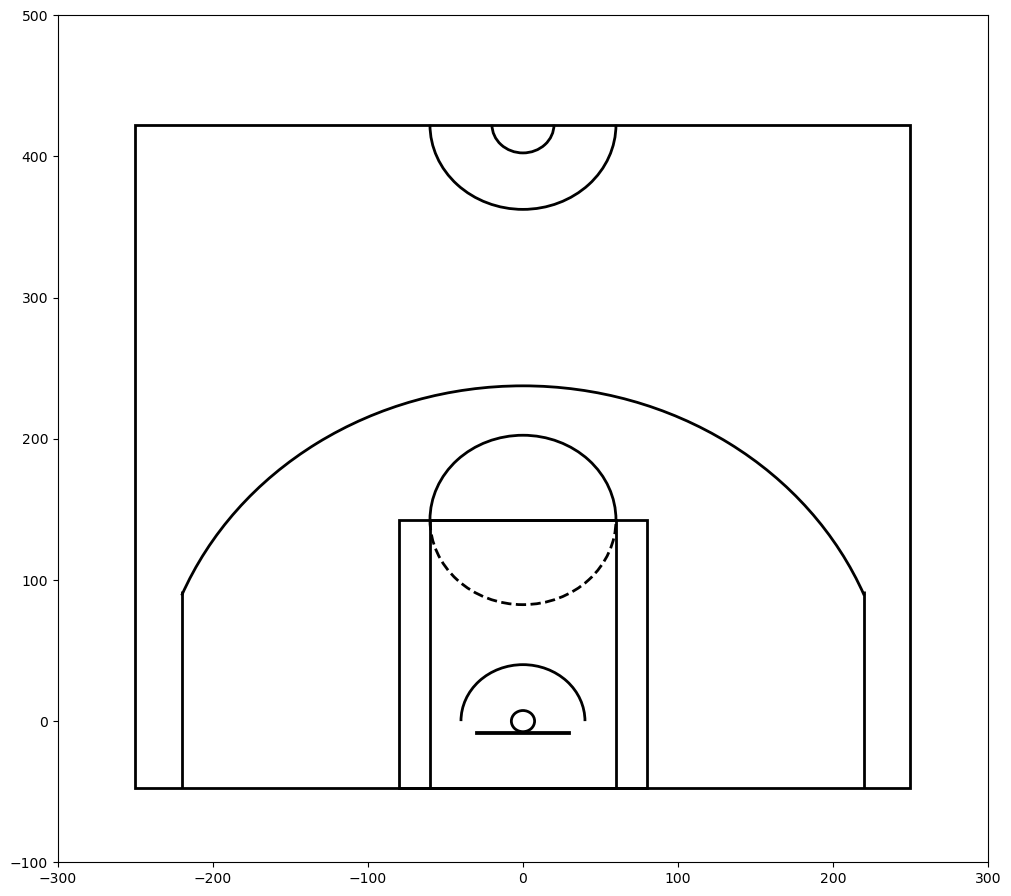

In [17]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

# Code to make basketball court
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

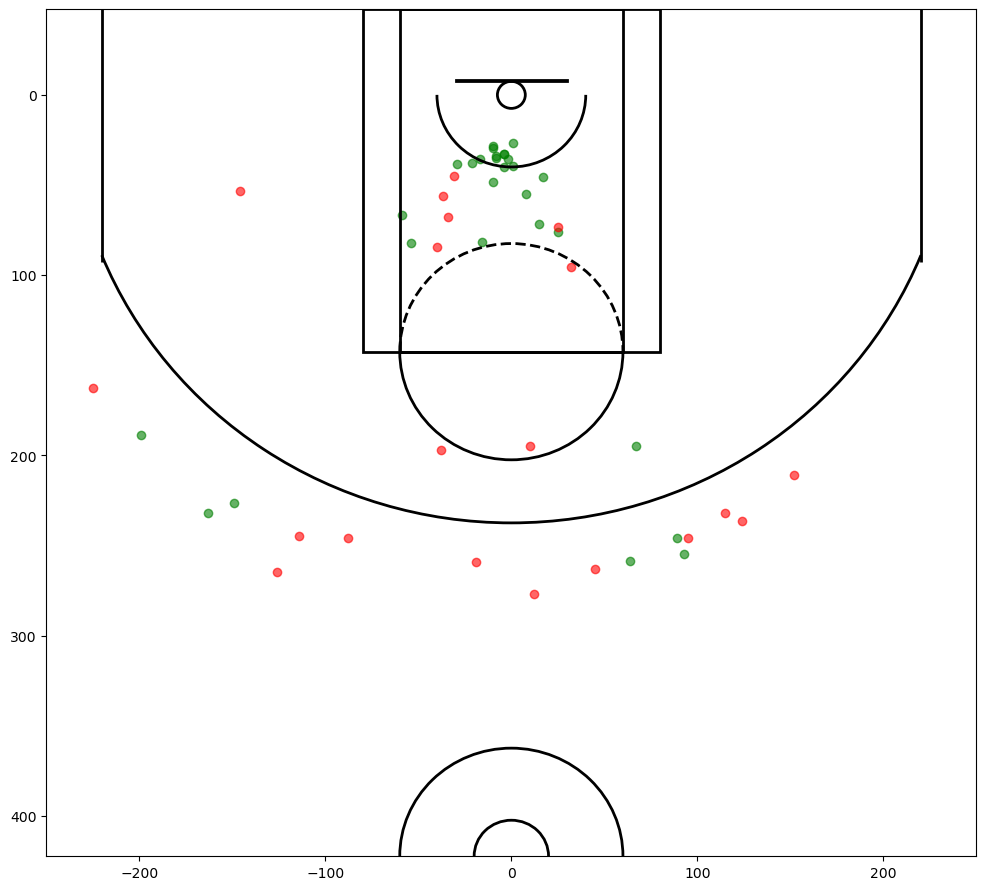

In [21]:
plt.figure(figsize=(12,11))
#plt.scatter(victor.x, victor.y)
plt.scatter(vmade_shots['x'], vmade_shots['y'], color='green', label='Made Shot', alpha=0.6)
plt.scatter(vmissed_shots['x'], vmissed_shots['y'], color='red', label='Missed Shot', alpha=0.6)
draw_court()
# Descending values along the axis from left to right
plt.xlim(-250,250)
plt.ylim(422.5,-47.5)
plt.savefig(r'C:\da12\projects\capstone\capstone_DA12_NBA\victor_shots.jpg')
plt.show()

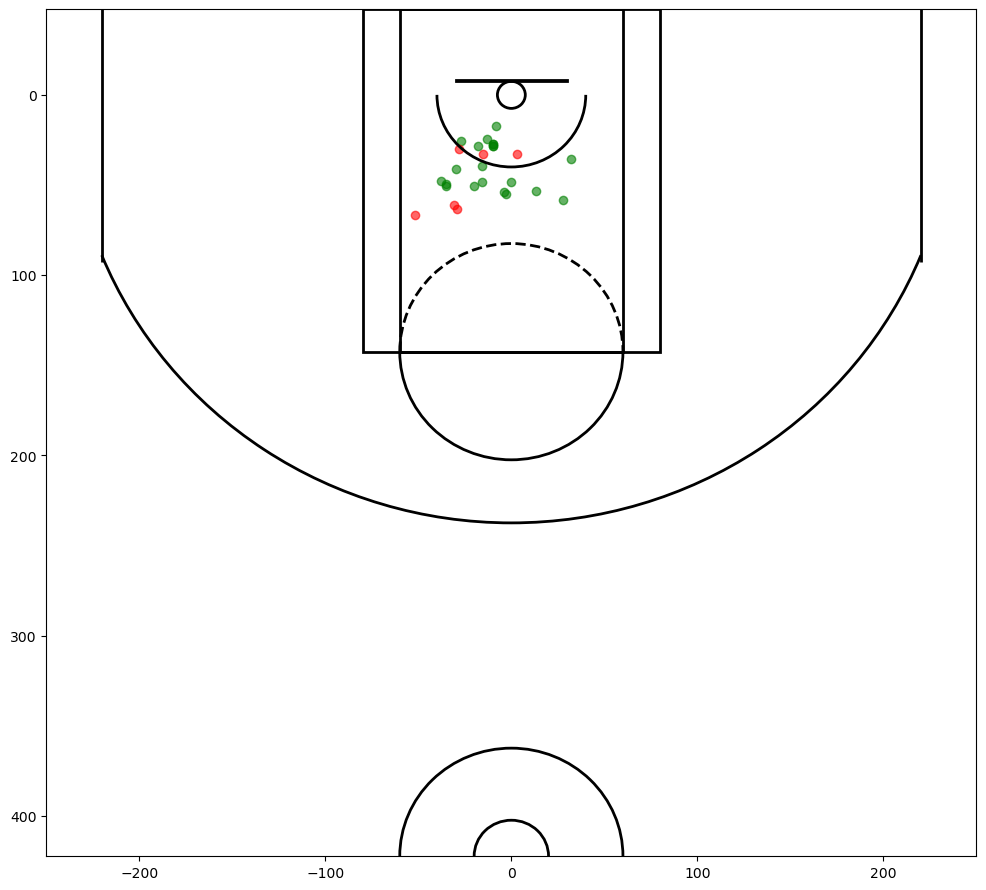

In [22]:
plt.figure(figsize=(12,11))
#plt.scatter(victor.x, victor.y)
plt.scatter(tmade_shots['x'], tmade_shots['y'], color='green', label='Made Shot', alpha=0.6)
plt.scatter(tmissed_shots['x'], tmissed_shots['y'], color='red', label='Missed Shot', alpha=0.6)
draw_court()
# Descending values along the axis from left to right
plt.xlim(-250,250)
plt.ylim(422.5,-47.5)
plt.savefig(r'C:\da12\projects\capstone\capstone_DA12_NBA\tjd_shots.jpg')
plt.show()

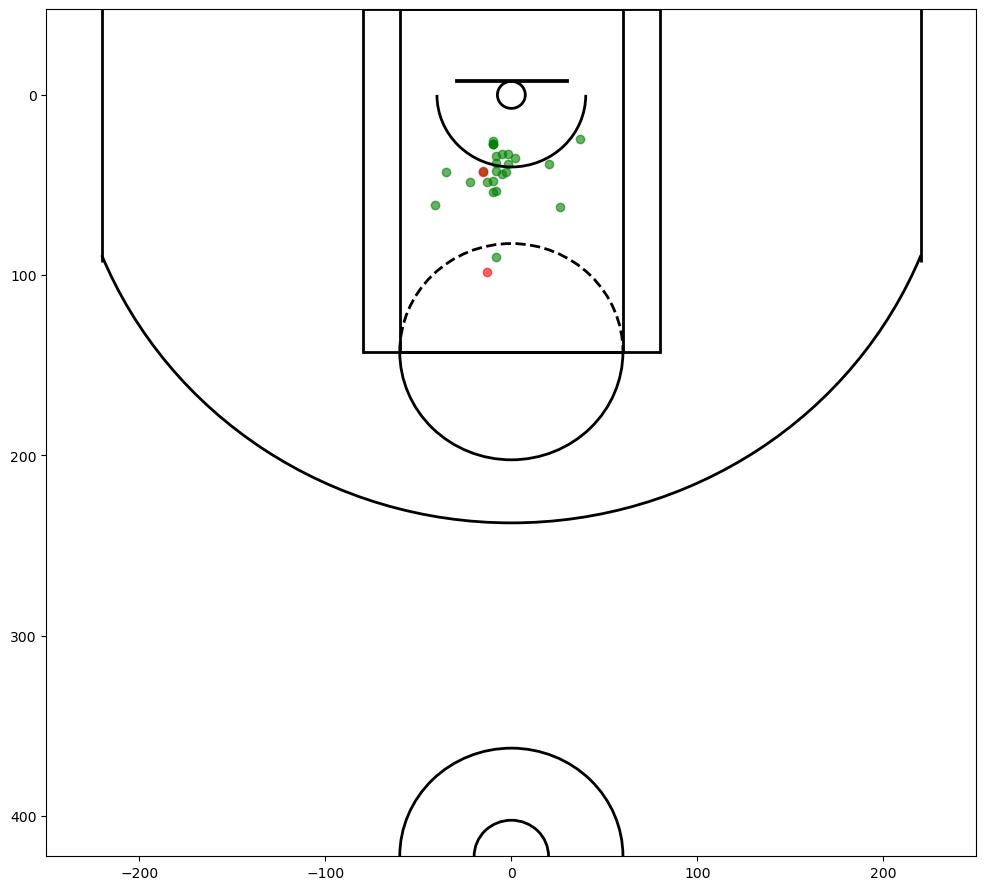

In [24]:
plt.figure(figsize=(12,11))
#plt.scatter(victor.x, victor.y)
plt.scatter(dmade_shots['x'], dmade_shots['y'], color='green', label='Made Shot', alpha=0.6)
plt.scatter(dmissed_shots['x'], dmissed_shots['y'], color='red', label='Missed Shot', alpha=0.6)
draw_court()
# Descending values along the axis from left to right
plt.xlim(-250,250)
plt.ylim(422.5,-47.5)
plt.savefig(r'C:\da12\projects\capstone\capstone_DA12_NBA\derek_shots.jpg')
plt.show()

In [26]:
most_efficient_per = most_efficient.mean()
most_efficient_per

C:\Users\zecha\AppData\Local\Temp\ipykernel_4736\2985954699.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  most_efficient_per = most_efficient.mean()


level_0            15.333333
index              22.333333
PICK               23.333333
YEAR             2023.000000
G                  64.666667
MP                 23.266667
FG                  5.066667
FGA                 9.000000
FT                  1.966667
FTA                 2.866667
ORB                 2.266667
DRB                 5.266667
AST                 2.066667
STL                 0.766667
BLK                 2.033333
TOV                 1.766667
PF                  2.133333
PTS                12.700000
ADVANCED_WS         4.466667
ADVANCED_BPM        2.833333
ADVANCED_VORP       2.000000
PER                22.266667
dtype: float64